In [66]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV
from sklearn.metrics import classification_report
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

**EDA AND FILLING NULL VALUES**

In [67]:
# reading csv files 
data_train = pd.read_csv('Project_train_dataset.csv', index_col='Student ID')

In [68]:
data_train

,Program,Student Gender,Experience Level,Student Siblings,Student Family,Financial Background,School Dormitory,School of Origin,Student Social Influence,Favourite Study Element,Admitted in School
Student ID,,,,,,,,,,,
1,Sorcery School,male,22.0,1,0,7.2500,NaN,Mystic Academy,18,Fire,0
2,Magi Academy,female,38.0,1,0,71.2833,Cottage Chamber,Eldertree Enclave,7,Fire,1
3,Sorcery School,female,26.0,0,0,7.9250,NaN,Mystic Academy,12,Air,1
5,Sorcery School,male,35.0,0,0,8.0500,NaN,Mystic Academy,12,Air,0
6,Sorcery School,male,NaN,0,0,8.4583,NaN,Arcan Institute,11,Earth,0
...,...,...,...,...,...,...,...,...,...,...,...
883,Sorcery School,female,22.0,0,0,10.5167,NaN,Mystic Academy,17,Earth,0
884,Witchcraft Institute,male,28.0,0,0,10.5000,NaN,Mystic Academy,9,Water,0
887,Witchcraft Institute,male,27.0,0,0,13.0000,NaN,Mystic Academy,8,Water,0


In [69]:
#checking for null values in the columns
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 1 to 889
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Program                   713 non-null    object 
 1   Student Gender            713 non-null    object 
 2   Experience Level          567 non-null    float64
 3   Student Siblings          713 non-null    int64  
 4   Student Family            713 non-null    int64  
 5   Financial Background      713 non-null    float64
 6   School Dormitory          153 non-null    object 
 7   School of Origin          713 non-null    object 
 8   Student Social Influence  713 non-null    int64  
 9   Favourite Study Element   713 non-null    object 
 10  Admitted in School        713 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [70]:
#filling null values in the Experience Level column using K-Nearest Neighbor Algorithm
imputer = KNNImputer(n_neighbors=5).fit(data_train.select_dtypes(include=np.number))
filled_data = imputer.transform(data_train.select_dtypes(include=np.number))
data_train['Experience Level'] = filled_data.T[0]
data_train['Experience Level']

Student ID
1      22.0
2      38.0
3      26.0
5      35.0
6      22.6
       ... 
883    22.0
884    28.0
887    27.0
888    19.0
889    26.0
Name: Experience Level, Length: 713, dtype: float64

In [71]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 1 to 889
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Program                   713 non-null    object 
 1   Student Gender            713 non-null    object 
 2   Experience Level          713 non-null    float64
 3   Student Siblings          713 non-null    int64  
 4   Student Family            713 non-null    int64  
 5   Financial Background      713 non-null    float64
 6   School Dormitory          153 non-null    object 
 7   School of Origin          713 non-null    object 
 8   Student Social Influence  713 non-null    int64  
 9   Favourite Study Element   713 non-null    object 
 10  Admitted in School        713 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [72]:
#filling School Dormitory column using DecisionTreeClassifier
modelDT = DecisionTreeClassifier().fit(data_train[data_train['School Dormitory'].notna()].select_dtypes(include=np.number), data_train[data_train['School Dormitory'].notna()]['School Dormitory'])
data_train['School Dormitory']=modelDT.predict(data_train.select_dtypes(include=np.number))


In [73]:
#validating that the rows are now fully filled
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 1 to 889
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Program                   713 non-null    object 
 1   Student Gender            713 non-null    object 
 2   Experience Level          713 non-null    float64
 3   Student Siblings          713 non-null    int64  
 4   Student Family            713 non-null    int64  
 5   Financial Background      713 non-null    float64
 6   School Dormitory          713 non-null    object 
 7   School of Origin          713 non-null    object 
 8   Student Social Influence  713 non-null    int64  
 9   Favourite Study Element   713 non-null    object 
 10  Admitted in School        713 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [74]:
variables = data_train.drop('Admitted in School', axis=1)
target = data_train['Admitted in School']

<Axes: xlabel='Admitted in School', ylabel='count'>

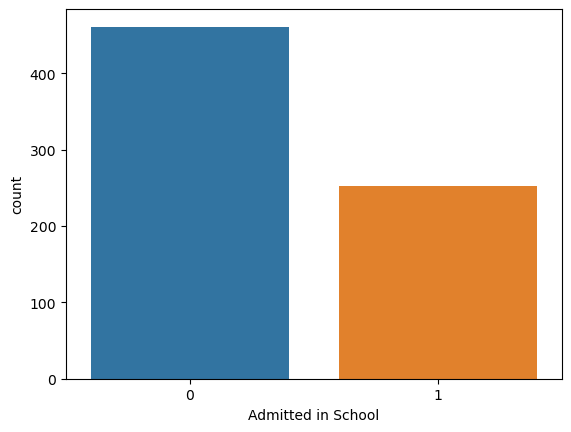

In [75]:
#plot the target variable
sns.countplot(x='Admitted in School', data=data_train)

In [76]:
#resample the dataset to 400 samples
from sklearn.utils import resample
data_train_majority = data_train[data_train['Admitted in School']==0]
data_train_minority = data_train[data_train['Admitted in School']==1]

data_train_minority_upsampled = resample(data_train_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=400,    # to match majority class
                                 random_state=123) # reproducible results
data_train_majority_downsampled = resample(data_train_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=400,    # to match majority class
                                 random_state=123) # reproducible results
data_train = pd.concat([data_train_majority_downsampled, data_train_minority_upsampled])

<Axes: xlabel='Admitted in School', ylabel='count'>

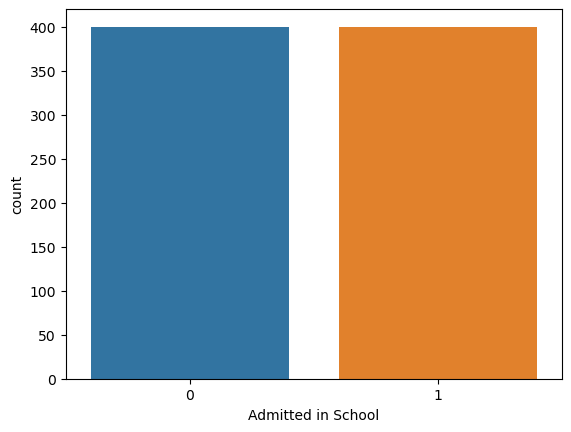

In [77]:
#plot the target variable
sns.countplot(x='Admitted in School', data=data_train)

**SPLITTING AND SCALING**

In [78]:
X_train, X_val, y_train, y_val = train_test_split(variables, 
                                                  target, 
                                                  train_size = 0.7, 
                                                  random_state = 0, 
                                                  stratify = target, 
                                                  shuffle = True)

In [79]:
X_train_n = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_train_c = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)

X_val_n = X_val.select_dtypes(include=np.number).set_index(X_val.index)
X_val_c = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

In [80]:
X_train_n

,Experience Level,Student Siblings,Student Family,Financial Background,Student Social Influence
Student ID,,,,,
732,11.00,0,0,18.7875,19
717,38.00,0,0,227.5250,20
803,11.00,1,2,120.0000,10
190,36.00,0,0,7.8958,15
832,0.83,1,1,18.7500,14
...,...,...,...,...,...
197,21.80,0,0,7.7500,10
173,1.00,1,1,11.1333,3
577,34.00,0,0,13.0000,16


In [81]:
X_train_c

,Program,Student Gender,School Dormitory,School of Origin,Favourite Study Element
Student ID,,,,,
732,Sorcery School,male,Mystical Chamber,Eldertree Enclave,Water
717,Magi Academy,female,Cottage Chamber,Eldertree Enclave,Air
803,Magi Academy,male,Mystical Chamber,Mystic Academy,Air
190,Sorcery School,male,Python Quarters,Mystic Academy,Fire
832,Witchcraft Institute,male,Grand Chambers,Mystic Academy,Air
...,...,...,...,...,...
197,Sorcery School,male,Python Quarters,Arcan Institute,Water
173,Sorcery School,female,Mystical Chamber,Mystic Academy,Water
577,Witchcraft Institute,female,Dragon Room,Mystic Academy,Fire


In [82]:
#creating different instances and fitting them with the training numerical data
st_scaler = StandardScaler().fit(X_train_n)

In [83]:
#transforming training data using different fitted scalers as well as structuring it into DataFrames
X_train_n_scl_st = st_scaler.transform(X_train_n) 
X_train_n_scl_st = pd.DataFrame(X_train_n_scl_st, columns = X_train_n.columns).set_index(X_train_n.index)

In [84]:
#transforming validation data using different fitted scalers as well as structuring it into DataFrames
X_val_n_scl_st = st_scaler.transform(X_val_n)
X_val_n_scl_st = pd.DataFrame(X_val_n_scl_st, columns = X_val_n.columns).set_index(X_val_n.index)

**FEATURE SELECTION**

In [85]:
#checking for possibly droppable irrelevant numerical columns (if var = 0)
X_train_n_scl_st.var()

Experience Level            1.002008
Student Siblings            1.002008
Student Family              1.002008
Financial Background        1.002008
Student Social Influence    1.002008
dtype: float64

In [86]:
#preparing to check if any of the independent variables are correlated with the target
all_train_n = X_train_n_scl_st.join(y_train)
all_train_n.head()

,Experience Level,Student Siblings,Student Family,Financial Background,Student Social Influence,Admitted in School
Student ID,,,,,,
732,-1.370914,-0.477854,-0.464410,-0.226063,0.864289,0
717,0.608769,-0.477854,-0.464410,4.251390,1.011032,1
803,-1.370914,0.432257,2.014100,1.944961,-0.456406,1
190,0.462126,-0.477854,-0.464410,-0.459691,0.277313,0
832,-2.116595,0.432257,0.774845,-0.226867,0.130570,1


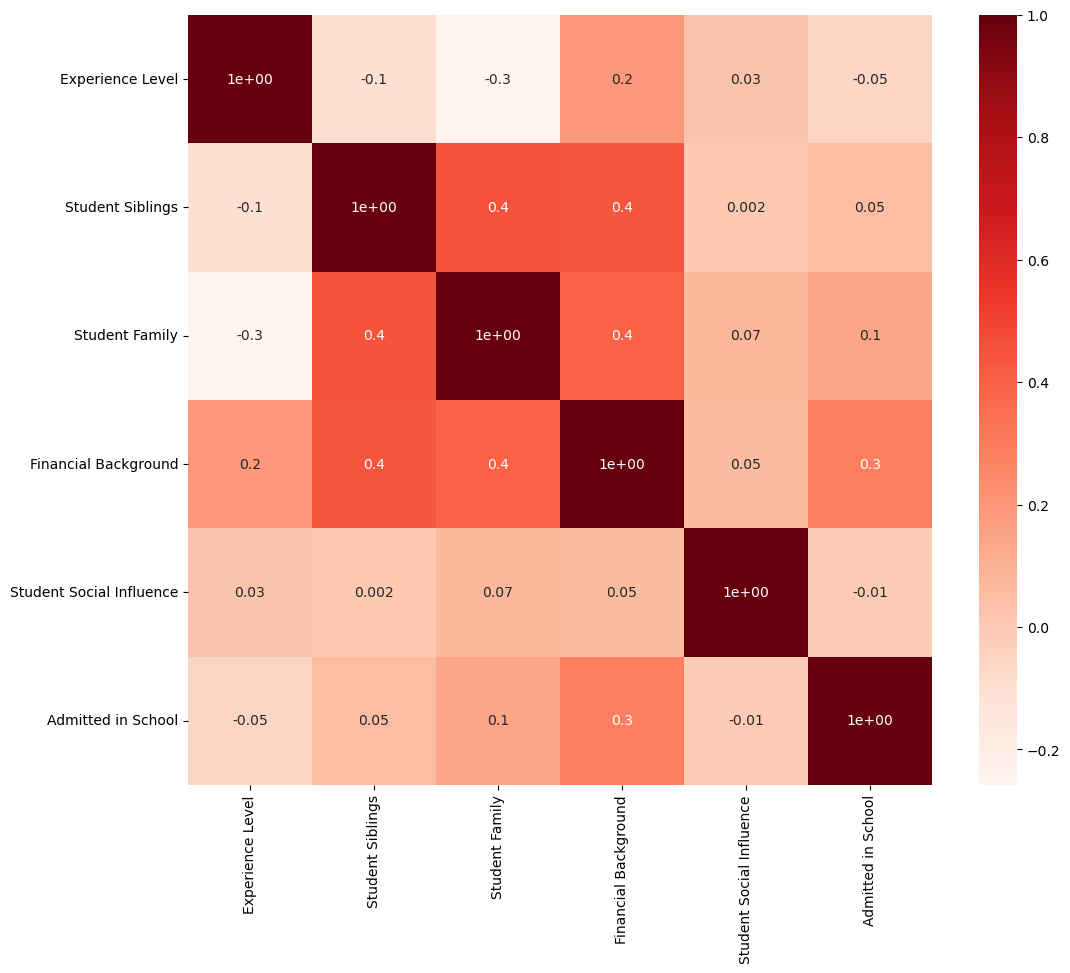

In [87]:
#plotting the correlation between the variables
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()
cor_spearman = all_train_n.corr(method ='spearman')
cor_heatmap(cor_spearman)

In [88]:
#checking the importance of the categorical independent variables in the target
def TestIndependence(X,y,var,alpha=0.05):   
    '''receive as arguments the dataset of independent variables, the target,
    the name of each independent variable and the alpha defined. This function will 
    follow the steps of chi-square to check if a independent variable is an important predictor'''
    
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

for var in X_train_c:
    TestIndependence(X_train_c[var],y_train, var)

Program is IMPORTANT for Prediction
Student Gender is IMPORTANT for Prediction
School Dormitory is IMPORTANT for Prediction
School of Origin is IMPORTANT for Prediction
Favourite Study Element is NOT an important predictor. (Discard Favourite Study Element from model)


In [89]:
#Checking for the optimum number of features to use in the model
nof_list=np.arange(1,7)            
high_score=0
# Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_n_scl_st,y_train)
    X_val_rfe = rfe.transform(X_val_n_scl_st)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 5
Score with 5 features: 0.710280


In [90]:
#checking the importance of each one of the numerical variables
model = LogisticRegression()
rfe = RFE(estimator = model, n_features_to_select = 4)
X_rfe = rfe.fit_transform(X = X_train_n_scl_st, y = y_train)

In [91]:
#the 1 variable that is the optimum to use is marked as True
selected_features = pd.Series(rfe.support_, index = X_train_n_scl_st.columns)
selected_features

Experience Level             True
Student Siblings             True
Student Family               True
Financial Background         True
Student Social Influence    False
dtype: bool

In [92]:
#using Lasso Regression method to figure out on the relevant variables
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,5))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

Experience Level           -0.057494
Student Siblings           -0.061576
Student Family              0.030464
Financial Background        0.118845
Student Social Influence   -0.007224
dtype: float64
Experience Level            False
Student Siblings            False
Student Family              False
Financial Background        False
Student Social Influence    False
dtype: bool


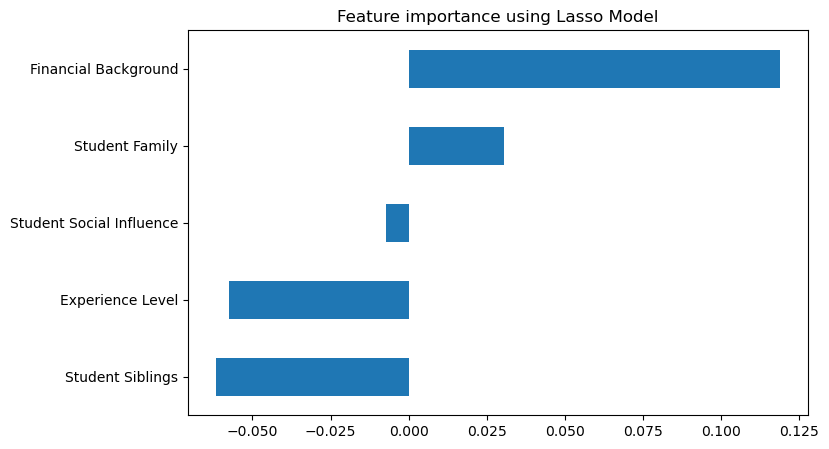

In [93]:
reg = LassoCV()
reg.fit(X_train_n_scl_st, y_train)
coef = pd.Series(reg.coef_, index = X_train_n_scl_st.columns)
print(coef)
print(coef == 0)
plot_importance(coef,'Lasso')

In [94]:
pd.DataFrame(X_train_n.T.index)

,0
0,Experience Level
1,Student Siblings
2,Student Family
3,Financial Background
4,Student Social Influence


**FEATURE SELECTION CONCLUSION**

| Variable | Importance|
|----------|-----------|
|Program|IMPORTANT|
|Student Gender|IMPORTANT|
|School Dormitory|IMPORTANT|
|School of Origin|IMPORTANT|
|Favourite Study Element|NOT IMPORTANT|

| Variable |RFE | Lasso | Decision|
|-----|-------|-------|----------|
|Experience Level|IMPORTANT|IMPORTANT|Keep|
|Student Siblings|IMPORTANT|IMPORTANT|Keep|
|Student Family|IMPORTANT|IMPORTANT|Keep|
|Financial Background|IMPORTANT|IMPORTANT|Keep|
|Student Social Influence|NOT IMPORTANT|NOT IMPORTANT|Discard|


In [95]:
#dropping the least important categorical variable
X_train_c=X_train_c.drop('Favourite Study Element', axis=1)
X_val_c=X_val_c.drop('Favourite Study Element', axis=1)

In [96]:
#dropping the least important numerical variable
X_train_n = X_train_n_scl_st.drop(['Student Social Influence'],axis=1)
X_val_n = X_val_n_scl_st.drop(['Student Social Influence'],axis=1)

**ENCODING**

In [97]:
# Apply one-hot encoding to categorical data
encoder = OneHotEncoder()
X_train_c_encoded = encoder.fit_transform(X_train_c)
# Combine the encoded categorical data and numerical data
X_train_combined = np.hstack((X_train_n, X_train_c_encoded.toarray()))

In [98]:
# preprocessing X_val
X_val_c_encoded = encoder.transform(X_val_c)
X_val_combined = np.hstack((X_val_n, X_val_c_encoded.toarray()))

**MODELS**

In [99]:
# NN
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

model_NN = MLPClassifier(alpha = 0.5, max_iter=1000, random_state=0)

# Create a KFold cross-validator with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

model_NN.fit(X_train_combined, y_train)

print(classification_report(y_val, model_NN.predict(X_val_combined)))


              precision    recall  f1-score   support

           0       0.81      0.94      0.87       138
           1       0.85      0.59      0.70        76

    accuracy                           0.82       214
   macro avg       0.83      0.77      0.78       214
weighted avg       0.82      0.82      0.81       214



In [100]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier

model_DTC = DecisionTreeClassifier().fit(X_train_combined, y_train)
model_ETC = ExtraTreesClassifier().fit(X_train_combined, y_train)
model_RFC = RandomForestClassifier().fit(X_train_combined, y_train)
model_LR = LogisticRegression().fit(X_train_combined, y_train)

#create ensemble model
model_VC = VotingClassifier(estimators=[('DTC', model_DTC), ('ETC', model_ETC), ('RFC', model_RFC), ('LR', model_LR)], voting='hard').fit(X_train_combined, y_train)

#create bagging model
model_Bagging = BaggingClassifier(base_estimator=model_RFC, n_estimators=30, random_state=0).fit(X_train_combined, y_train)

In [101]:
from sklearn.metrics import f1_score

#create predictions
pred_DTC = model_DTC.predict(X_val_combined)
pred_ETC = model_ETC.predict(X_val_combined)
pred_RFC = model_RFC.predict(X_val_combined)
pred_LR = model_LR.predict(X_val_combined)
pred_NN = model_NN.predict(X_val_combined)

#predict with ensemble and bagging models
pred_Ensemble = model_VC.predict(X_val_combined)
pred_Bagging = model_Bagging.predict(X_val_combined)

models = [model_DTC, model_ETC, model_RFC, model_LR, model_VC, model_Bagging, model_NN]

for model in models:
    print(model)
    print(classification_report(y_val, model.predict(X_val_combined)))

#make a table of the accuracy of each model
accuracy = pd.DataFrame(columns=['Model', 'Accuracy', 'f1-score'])
accuracy['Model'] = ['Decision Tree', 'Extra Trees', 'Random Forest', 'Logistic Regression', 'Voting Classifier', 'Bagging Classifier', 'Neural Network']
for i in range(len(models)):
    accuracy['Accuracy'][i] = models[i].score(X_val_combined, y_val)
    accuracy['f1-score'][i] = f1_score(y_val, models[i].predict(X_val_combined))

accuracy.sort_values(by='Accuracy', ascending=False)

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       138
           1       0.71      0.68      0.70        76

    accuracy                           0.79       214
   macro avg       0.77      0.77      0.77       214
weighted avg       0.79      0.79      0.79       214

ExtraTreesClassifier()
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       138
           1       0.76      0.63      0.69        76

    accuracy                           0.80       214
   macro avg       0.79      0.76      0.77       214
weighted avg       0.80      0.80      0.79       214

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       138
           1       0.81      0.61      0.69        76

    accuracy                           0.81       214
   macro avg       0.81      0.76      0.78       214
w

,Model,Accuracy,f1-score
4,Voting Classifier,0.82243,0.716418
5,Bagging Classifier,0.82243,0.712121
6,Neural Network,0.817757,0.697674
2,Random Forest,0.808411,0.691729
1,Extra Trees,0.799065,0.690647
3,Logistic Regression,0.794393,0.690141
0,Decision Tree,0.78972,0.697987


In [102]:
#select the best model
best_model = model_VC

PREDICT ON TEST DATA

In [103]:
#read
data_test = pd.read_csv('Project_test_dataset.csv', index_col='Student ID')

#preprocess the test data
#filling null values in the Experience Level column using K-Nearest Neighbor Algorithm
imputer = KNNImputer(n_neighbors=5).fit(data_test.select_dtypes(include=np.number))
filled_data = imputer.transform(data_test.select_dtypes(include=np.number))

data_test['Experience Level'] = filled_data.T[0]

#filling School Dormitory column using DecisionTreeClassifier
modelDT = DecisionTreeClassifier().fit(data_test[data_test['School Dormitory'].notna()].select_dtypes(include=np.number), data_test[data_test['School Dormitory'].notna()]['School Dormitory'])

data_test['School Dormitory']=modelDT.predict(data_test.select_dtypes(include=np.number))

#scale numerical data
X_test_n_scl_st = st_scaler.transform(data_test.select_dtypes(include=np.number))
X_test_n_scl_st = pd.DataFrame(X_test_n_scl_st, columns = data_test.select_dtypes(include=np.number).columns).set_index(data_test.select_dtypes(include=np.number).index)

#drop irrelevant columns
X_test_n_scl_st = X_test_n_scl_st.drop(['Student Social Influence'],axis=1)

#encode categorical data
X_test_c = data_test.select_dtypes(exclude=np.number).drop('Favourite Study Element', axis=1)
X_test_c_encoded = encoder.transform(X_test_c)

#combine numerical and categorical data
X_test_combined = np.hstack((X_test_n_scl_st, X_test_c_encoded.toarray()))

#predict the test data with the best model
pred_test = best_model.predict(X_test_combined)

#write the predictions to a csv file with two coloms Student ID and Admitted in School
pred_test = pd.DataFrame(pred_test, columns=['Admitted in School'], index=data_test.index)
pred_test.to_csv('Group15_Version10.csv')

In [104]:
pred_test

,Admitted in School
Student ID,
836,1
323,1
117,0
444,1
619,1
...,...
21,0
366,0
890,0


<Axes: xlabel='Admitted in School', ylabel='count'>

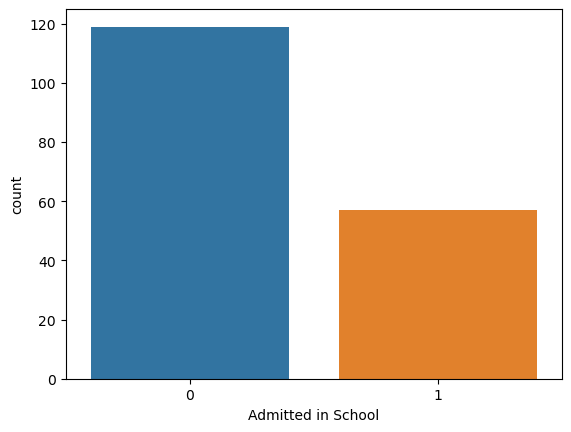

In [105]:
sns.countplot(x='Admitted in School', data=pred_test)

In [115]:
fb = pd.DataFrame(data_test, columns=['Financial Background'], index=data_test.index)

In [116]:
FinancialBack_outcome = pd.merge(fb, pred_test, left_index=True, right_index=True)

In [117]:
FinancialBack_outcome 

,Financial Background,Admitted in School
Student ID,,
836,83.1583,1
323,12.3500,1
117,7.7500,0
444,13.0000,1
619,39.0000,1
...,...,...
21,26.0000,0
366,7.2500,0
890,30.0000,0


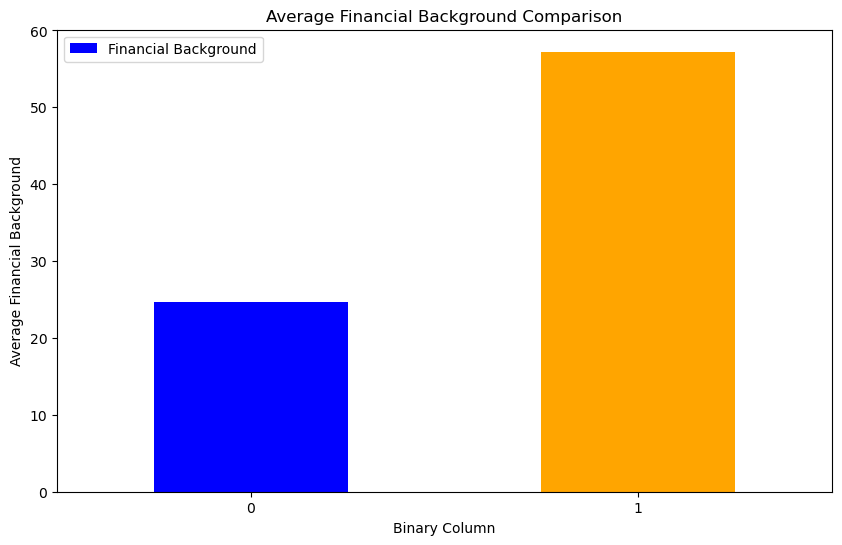

In [118]:

numerical_column = 'Financial Background'
binary_column = 'Admitted in School'


grouped_data = FinancialBack_outcome.groupby(binary_column)[numerical_column].mean()

# Plotting a bar chart
grouped_data.plot(kind='bar', color=['blue', 'orange'], figsize=(10, 6), legend=True)
plt.title('Average Financial Background Comparison')
plt.xlabel('Binary Column')
plt.ylabel('Average Financial Background')
plt.xticks([0, 1], ['0', '1'], rotation=0)
plt.show()